In [62]:
import numpy as np
import pandas as pd
import datetime as dt   
import matplotlib.pyplot as plt

# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


In [75]:
# reading train set (120 len test, 750 len train)
train = pd.read_csv("../data/weather/AarhusSydObservations/data_partitions/Partition_test_360_train_750_train.csv")
test = pd.read_csv("../data/weather/AarhusSydObservations/data_partitions/Partition_test_360_train_750_test.csv")

print(len(train))
print(len(test))

# reading test set
test = test.drop(columns=['Luftfugtighed', 'Nedbør', 'Nedbørsminutter','Maksimumtemperatur', 'Minimumtemperatur', 'Skyhøjde', 'Skydække', 'Middelvindhastighed', 'Højeste vindstød'])
train = train.drop(columns=['Luftfugtighed', 'Nedbør', 'Nedbørsminutter','Maksimumtemperatur', 'Minimumtemperatur', 'Skyhøjde', 'Skydække', 'Middelvindhastighed', 'Højeste vindstød'])

# make DateTime the index
train['DateTime'] = pd.to_datetime(train['DateTime'])
train = train.set_index('DateTime')

test['DateTime'] = pd.to_datetime(test['DateTime'])
test = test.set_index('DateTime')

750
360


In [65]:
test[0:5]

,Middeltemperatur
DateTime,
2024-04-16 01:00:00,5.9
2024-04-16 02:00:00,5.7
2024-04-16 03:00:00,5.8
2024-04-16 04:00:00,5.4
2024-04-16 05:00:00,4.9


In [66]:
train[-20:]

,Middeltemperatur
DateTime,
2024-04-15 05:00:00,1.2
2024-04-15 06:00:00,3.5
2024-04-15 07:00:00,4.7
2024-04-15 08:00:00,5.8
2024-04-15 09:00:00,7.1
2024-04-15 10:00:00,8.0
2024-04-15 11:00:00,8.9
2024-04-15 12:00:00,9.2
2024-04-15 13:00:00,8.8


In [67]:
# Selecting middeltemperatur values
dataset_train = train.Middeltemperatur.values 
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 

# Selecting Open Price values
dataset_test = test.Middeltemperatur.values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1)) 

scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)

# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test) 

sequencing

In [69]:
X_train = []
y_train = []
for i in range(50, len(scaled_train)):
	X_train.append(scaled_train[i-50:i, 0])
	y_train.append(scaled_train[i, 0])

X_test = []
y_test = []
for i in range(50, len(scaled_test)):
	X_test.append(scaled_test[i-50:i, 0])
	y_test.append(scaled_test[i, 0])

converting to np array

In [70]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :", X_train.shape,"y_train :", y_train.shape)

# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)


X_train : (700, 50, 1) y_train : (700, 1)
X_test : (310, 50, 1) y_test : (310, 1)


RNN model

In [113]:
# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 3,
						activation = "tanh",
						return_sequences = True,
						input_shape = (X_train.shape[1],1)))

regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 3, 
						activation = "tanh",
						return_sequences = True))

regressor.add(SimpleRNN(units = 3,
						activation = "tanh",
						return_sequences = True))
regressor.add(SimpleRNN(units = 3))	

# adding the output layer
regressor.add(Dense(units = 1, activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01, # learning rate
                                  decay=1e-6, # 
                                  momentum=0.9, 
                                  nesterov=True), 
					loss = "mean_squared_error")

# fitting the model
regressor.fit(X_train, y_train, epochs = 10, batch_size = 2)
regressor.summary()

Epoch 1/10


/Users/wibe/Documents/Skole/UNI_CogSci/8_semester/Data Science/data_science_exam_24/venv_data_science_exam/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/wibe/Documents/Skole/UNI_CogSci/8_semester/Data Science/data_science_exam_24/venv_data_science_exam/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


350/350 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0292
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0109
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0086
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0084
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0071
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0076
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0057
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0054
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0051
Epoch 10/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0051


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_60 (SimpleRNN)       │ (None, 50, 3)          │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 50, 3)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_61 (SimpleRNN)       │ (None, 50, 3)          │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_62 (SimpleRNN)       │ (None, 50, 3)          │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_63 (SimpleRNN)       │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166 (668.00 B)

 Trainable params: 82 (328.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 84 (340.00 B)

In [114]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [115]:
y_RNN_O = scaler.inverse_transform(y_RNN)

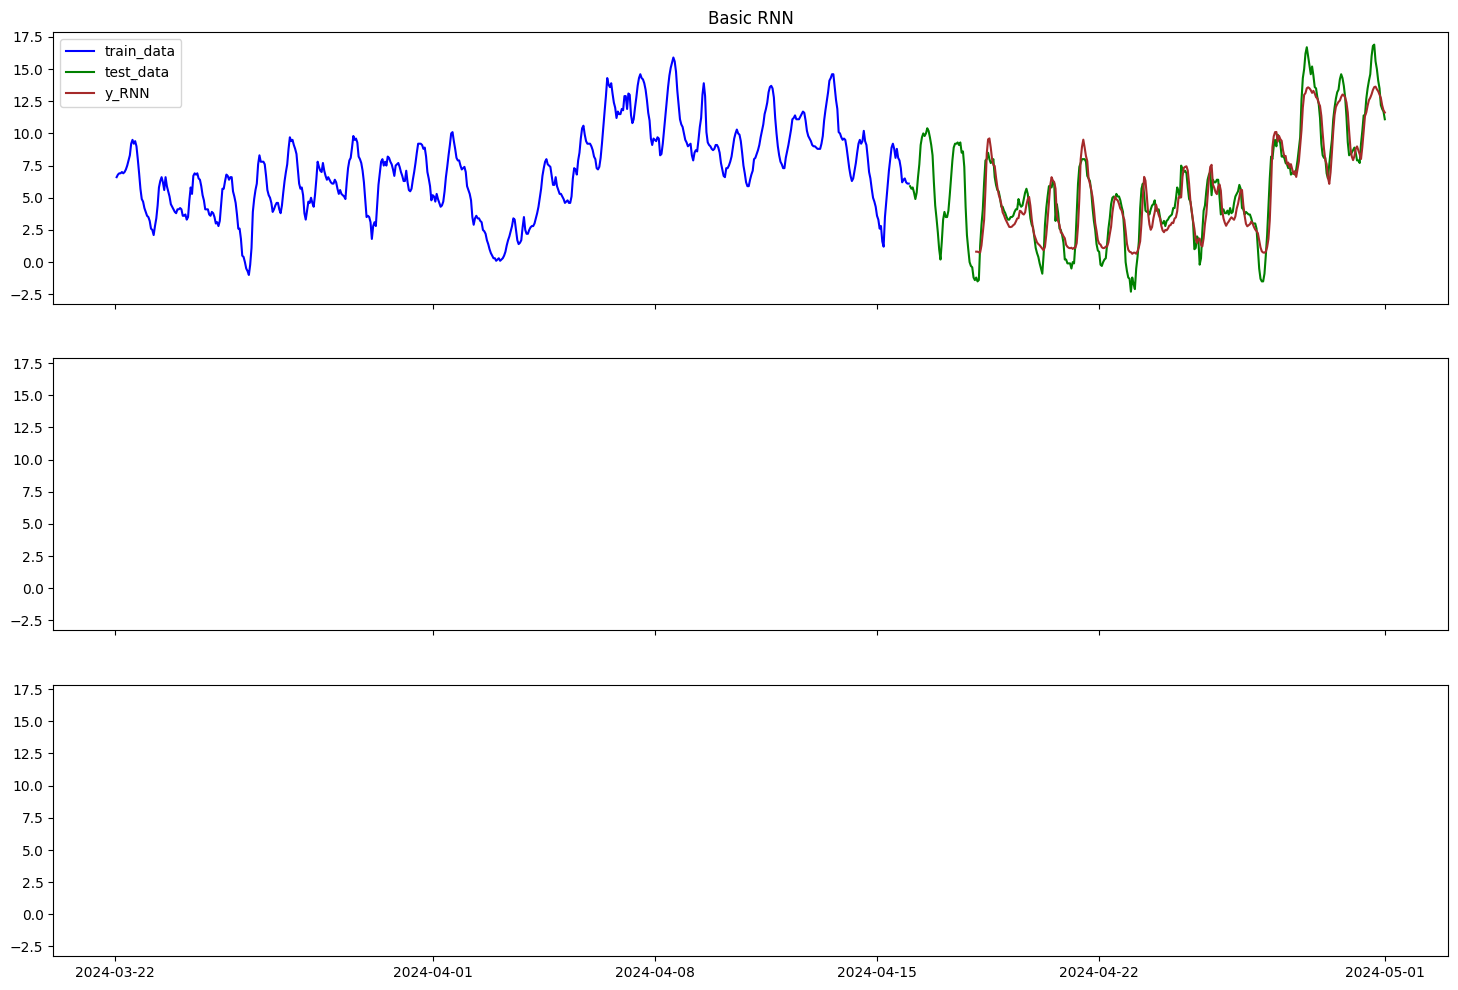

In [116]:
fig, axs = plt.subplots(3,figsize =(18,12), sharex=True, sharey=True)

axs[0].plot(train.index[150:], train.Middeltemperatur[150:], label = "train_data", color = "b")
axs[0].plot(test.index, test.Middeltemperatur, label = "test_data", color = "g")
axs[0].plot(test.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")